In [1]:
import torch
import torch.nn as nn
import torchvision
import pandas as pd
import numpy as np
import pathlib
from torchvision import transforms as tr
import torch
from tqdm.notebook import tqdm
from PIL import Image
import torch
import torch.nn as nn
import pathlib
import pickle
import numpy as np
import time
from torchvision import transforms as tr
import random
import os
from torchvision.datasets import ImageFolder
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from IPython.display import clear_output
import telebot
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
from torch.optim import Optimizer

In [2]:
torch.manual_seed(42)
random.seed(0)
np.random.seed(42)

In [3]:
token_bot = "5874898181:AAFfXAt4gf3rwZULh67-x7Cjp7tQEdnT4Rk"
my_tg_token = "136712745"
bot = telebot.TeleBot(token_bot)

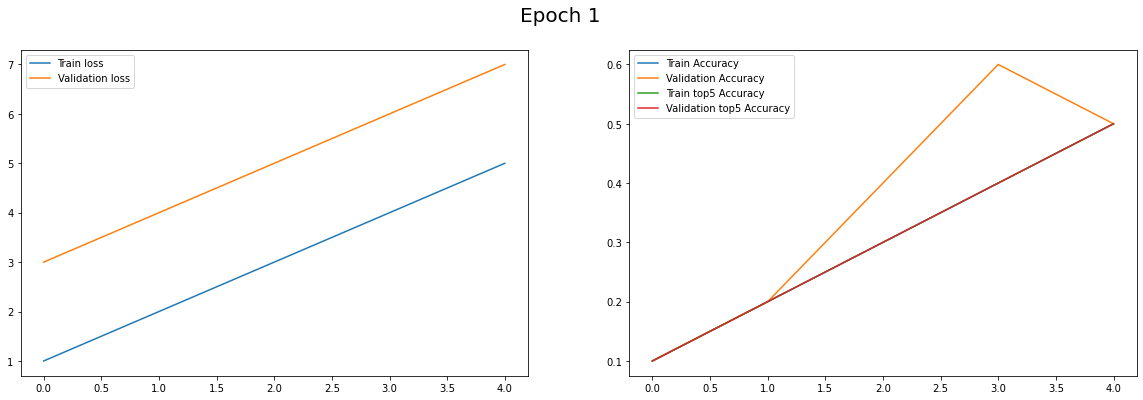

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle(f"Epoch {1}", fontsize=20)
axs[0].plot([1, 2, 3, 4, 5], label='Train loss')
axs[0].plot([3, 4, 5, 6, 7], label='Validation loss')
axs[0].legend()
axs[1].plot([0.1, 0.2, 0.3, 0.4, 0.5], label='Train Accuracy')
axs[1].plot([0.1, 0.2, 0.4, 0.6, 0.5], label='Validation Accuracy')
axs[1].plot([0.1, 0.2, 0.3, 0.4, 0.5], label='Train top5 Accuracy')
axs[1].plot([0.1, 0.2, 0.3, 0.4, 0.5], label='Validation top5 Accuracy')
axs[1].legend()
plt.show()

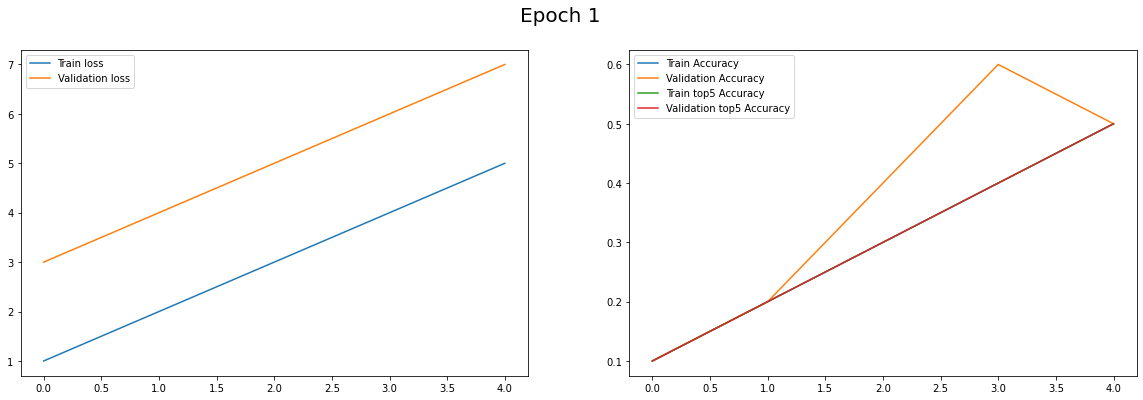

In [5]:
fig

In [30]:
fig.savefig('testfig.png')

In [34]:
bot.send_message(my_tg_token, 'sad')

In [36]:
bot.send_photo(my_tg_token, open('testfig.png', 'rb'))

In [3]:
class SGD(Optimizer):

    def __init__(self, params, lr=required, momentum=0, dampening=0,
                 weight_decay=0, nesterov=False):
        # ...

    def __setstate__(self, state):
        # ...

    def step(self, closure=None):
        # ...
        for group in self.param_groups:
            weight_decay = group['weight_decay']
            momentum = group['momentum']
            dampening = group['dampening']
            nesterov = group['nesterov']

            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data
                if weight_decay != 0:
                    d_p.add_(weight_decay, p.data)
                if momentum != 0:
                    param_state = self.state[p]
                    if 'momentum_buffer' not in param_state:
                        buf = param_state['momentum_buffer'] = torch.zeros_like(p.data)
                        buf.mul_(momentum).add_(d_p)
                    else:
                        buf = param_state['momentum_buffer']
                        buf.mul_(momentum).add_(1 - dampening, d_p)
                    if nesterov:
                        d_p = d_p.add(momentum, buf)
                    else:
                        d_p = buf

                p.data.add_(-group['lr'], d_p)

        return loss

IndentationError: expected an indented block (Temp/ipykernel_18304/707546134.py, line 7)

In [5]:
lr_logging = []
global lr_logging

In [6]:
import torch
import numpy as np
from torch.optim import Optimizer

class AdaptiveSGD(Optimizer):
    r"""Implements stochastic gradient descent (optionally with momentum).
    Nesterov momentum is based on the formula from
    `On the importance of initialization and momentum in deep learning`__.
    Args:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float): learning rate
        momentum (float, optional): momentum factor (default: 0)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        dampening (float, optional): dampening for momentum (default: 0)
        nesterov (bool, optional): enables Nesterov momentum (default: False)
    Example:
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
        >>> optimizer.zero_grad()
        >>> loss_fn(model(input), target).backward()
        >>> optimizer.step()
    __ http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf
    .. note::
        The implementation of SGD with Momentum/Nesterov subtly differs from
        Sutskever et. al. and implementations in some other frameworks.
        Considering the specific case of Momentum, the update can be written as
        .. math::
            \begin{aligned}
                v_{t+1} & = \mu * v_{t} + g_{t+1}, \\
                p_{t+1} & = p_{t} - \text{lr} * v_{t+1},
            \end{aligned}
        where :math:`p`, :math:`g`, :math:`v` and :math:`\mu` denote the 
        parameters, gradient, velocity, and momentum respectively.
        This is in contrast to Sutskever et. al. and
        other frameworks which employ an update of the form
        .. math::
            \begin{aligned}
                v_{t+1} & = \mu * v_{t} + \text{lr} * g_{t+1}, \\
                p_{t+1} & = p_{t} - v_{t+1}.
            \end{aligned}
        The Nesterov version is analogously modified.
    """

    def __init__(self, params, lr=1e-2, momentum=0, dampening=0,
                 weight_decay=0, nesterov=False):
        if lr and lr < 0.0:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if momentum < 0.0:
            raise ValueError("Invalid momentum value: {}".format(momentum))
        if weight_decay < 0.0:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))
        self.iteration = -1
        defaults = dict(lr=lr, momentum=momentum, dampening=dampening,
                        weight_decay=weight_decay, nesterov=nesterov)
        if nesterov and (momentum <= 0 or dampening != 0):
            raise ValueError("Nesterov momentum requires a momentum and zero dampening")
        super(AdaptiveSGD, self).__init__(params, defaults)
        for group in self.param_groups:
            group.setdefault('nesterov', False)
            for p in group['params']:
                state = self.state[p]
                state['prev_param'] = torch.zeros_like(p)
                state['current_param'] = torch.zeros_like(p)
                state['max_grad'] = torch.zeros_like(p)

    def step(self, closure=None):
        """Performs a single optimization step.
        Args:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()
        self.iteration += 1
        for group in self.param_groups:
            weight_decay = group['weight_decay']
            momentum = group['momentum']
            dampening = group['dampening']
            nesterov = group['nesterov']
            vector = []
            grads = []
            param = []
            for p in group['params']:
                if p.grad is None:
                    continue
                state = self.state[p]
                prev_param, current_param, max_grad = state['prev_param'], state['current_param'], state['max_grad']
                with torch.no_grad():
                    if(self.iteration == 0):
                        prev_param.add_(p)
                        d_p = p.grad
                        if weight_decay != 0:
                            d_p = d_p.add(p, alpha=weight_decay)
                        if momentum != 0:
                            if 'momentum_buffer' not in state:
                                buf = state['momentum_buffer'] = torch.clone(d_p).detach()
                            else:
                                buf = state['momentum_buffer']
                                buf.mul_(momentum).add_(d_p, alpha=1 - dampening)
                            if nesterov:
                                d_p = d_p.add(buf, alpha=momentum)
                            else:
                                d_p = buf
                        max_grad.add_(d_p)
                        p.add_(d_p, alpha=-group['lr'])
                        current_param.copy_(p).detach()
                    else:
                        vector.append(current_param.add(prev_param, alpha = -1))
                        grads.append(p.grad)
                        param.append(p)
            if(self.iteration > 0):
                hvp = torch.autograd.grad(outputs = grads, inputs = param, grad_outputs=vector)
                with torch.no_grad():
                    i = 0
                    for p in group['params']:
                        if p.grad is None:
                            continue
                        state = self.state[p]
                        prev_param, current_param, max_grad = state['prev_param'], state['current_param'], state['max_grad'] 
                        with torch.no_grad():
                            prev_param.copy_(current_param).detach()
                            d_p = p.grad
                            if weight_decay != 0:
                                d_p = d_p.add(p, alpha=weight_decay)
                            if momentum != 0:
                                if 'momentum_buffer' not in state:
                                    buf = state['momentum_buffer'] = torch.clone(d_p).detach()
                                else:
                                    buf = state['momentum_buffer']
                                    g = buf.add(hvp[i]).add(current_param-prev_param, alpha = weight_decay).mul(momentum).add(d_p, alpha=1 - dampening)
                                    #g = buf.add(hvp[i]).mul(1-momentum).add(d_p, alpha=momentum)
                                    val = None
                                    if(torch.norm(g) > torch.norm(max_grad)):
                                        val = max_grad*torch.div(g, torch.norm(g))
                                        max_grad.add_(g-max_grad)
                                    else:
                                        val = g
                                    buf.add_(val-buf)
                                    #buf.add_(hvp[i]).mul_(momentum).add_(d_p, alpha=1 - dampening)
                                if nesterov:
                                    d_p = d_p.add(buf, alpha=momentum)
                                else:
                                    d_p = buf
                            p.add_(d_p, alpha=-group['lr'])
                            current_param.copy_(p).detach()
                        i += 1
                            
        return loss

In [7]:
import torch
from torch.optim import Optimizer

class AdaptiveSGD_default(Optimizer):
    r"""Implements stochastic gradient descent (optionally with momentum).
    Nesterov momentum is based on the formula from
    `On the importance of initialization and momentum in deep learning`__.
    Args:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float): learning rate
        momentum (float, optional): momentum factor (default: 0)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        dampening (float, optional): dampening for momentum (default: 0)
        nesterov (bool, optional): enables Nesterov momentum (default: False)
    Example:
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
        >>> optimizer.zero_grad()
        >>> loss_fn(model(input), target).backward()
        >>> optimizer.step()
    __ http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf
    .. note::
        The implementation of SGD with Momentum/Nesterov subtly differs from
        Sutskever et. al. and implementations in some other frameworks.
        Considering the specific case of Momentum, the update can be written as
        .. math::
            \begin{aligned}
                v_{t+1} & = \mu * v_{t} + g_{t+1}, \\
                p_{t+1} & = p_{t} - \text{lr} * v_{t+1},
            \end{aligned}
        where :math:`p`, :math:`g`, :math:`v` and :math:`\mu` denote the 
        parameters, gradient, velocity, and momentum respectively.
        This is in contrast to Sutskever et. al. and
        other frameworks which employ an update of the form
        .. math::
            \begin{aligned}
                v_{t+1} & = \mu * v_{t} + \text{lr} * g_{t+1}, \\
                p_{t+1} & = p_{t} - v_{t+1}.
            \end{aligned}
        The Nesterov version is analogously modified.
    """

    def __init__(self, params, lr=1e-2, momentum=0, dampening=0,
                 weight_decay=0, nesterov=False, clip=False):
        if lr and lr < 0.0:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if momentum < 0.0:
            raise ValueError("Invalid momentum value: {}".format(momentum))
        if weight_decay < 0.0:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))
        self.clip = clip
        self.iteration = -1
        defaults = dict(lr=lr, momentum=momentum, dampening=dampening,
                        weight_decay=weight_decay, nesterov=nesterov)
        if nesterov and (momentum <= 0 or dampening != 0):
            raise ValueError("Nesterov momentum requires a momentum and zero dampening")
        super(AdaptiveSGD_default, self).__init__(params, defaults)
        for group in self.param_groups:
            group.setdefault('nesterov', False)
            for p in group['params']:
                state = self.state[p]
                state['displacement'] = torch.zeros_like(p)
                state['max_grad'] = torch.zeros(1, device = p.device)
    def step(self, closure=None):
        """Performs a single optimization step.
        Args:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()
        self.iteration += 1
        for group in self.param_groups:
            weight_decay = group['weight_decay']
            momentum = group['momentum']
            dampening = group['dampening']
            nesterov = group['nesterov']
            vector = []
            grads = []
            param = []
            for p in group['params']:
                if p.grad is None:
                    continue
                vector.append(self.state[p]['displacement'])
                grads.append(p.grad)
                param.append(p)

            hvp = torch.autograd.grad(outputs = grads, inputs = param, grad_outputs=vector)
            with torch.no_grad():
                i = 0
                for p in group['params']:
                    if p.grad is None:
                        continue
                    state = self.state[p]
                    displacement, max_grad = state['displacement'], state['max_grad'] 
                    with torch.no_grad():
                        d_p = p.grad
                        if weight_decay != 0:
                            d_p = d_p.add(p, alpha=weight_decay)
                        if momentum != 0:
                            if 'momentum_buffer' not in state:
                                buf = state['momentum_buffer'] = torch.clone(d_p).detach()
                            else:
                                buf = state['momentum_buffer']
                                buf.add_(hvp[i]).add_(displacement, alpha = weight_decay).mul_(momentum).add_(d_p, alpha=1 - dampening)
                                if self.clip:
                                    torch.nn.utils.clip_grad_norm_(buf, max_grad)
                                    max_grad.copy_(torch.maximum((1-dampening)/(1-momentum)*torch.norm(d_p), max_grad))
                            if nesterov:
                                d_p = d_p.add(buf, alpha=momentum)
                            else:
                                d_p = buf
                        displacement.copy_(d_p).mul_(-group['lr'])
                        p.add_(displacement)
                    i += 1
                            
        return 

In [7]:
class AdaptiveSGD_v1(Optimizer):
    def __init__(self, params, lr=1e-2, c = 0.1, w = 10, momentum=0, dampening=0,
                 weight_decay=0, nesterov=False):
#         self.clip = clip
        self.iteration = -1
        self.c = c
        self.w = w
        defaults = dict(lr=lr, momentum=momentum, dampening=dampening,
                        weight_decay=weight_decay, nesterov=nesterov)
    
        super(AdaptiveSGD_v1, self).__init__(params, defaults)
        for group in self.param_groups:
            for p in group['params']:
                state = self.state[p]
                state['displacement'] = torch.zeros_like(p)
#                 state['max_grad'] = torch.zeros(1, device = p.device)
                state['prev_param'] = torch.zeros_like(p)
                state['current_param'] = torch.zeros_like(p)
                state['max_grad'] = torch.zeros_like(p)
        
    def step(self, closure=None):
        """Performs a single optimization step.
        Args:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()
                
        self.iteration += 1
        for group in self.param_groups:
            weight_decay = group['weight_decay']
            momentum = group['momentum']
            dampening = group['dampening']
            nesterov = group['nesterov']
            vector = []
            grads = []
            param = []
            lr = group['lr']
            for p in group['params']:
                if p.grad is None:
                    continue
                state = self.state[p]
                prev_param, current_param, max_grad = state['prev_param'], state['current_param'], state['max_grad']
                with torch.no_grad():
                    if(self.iteration == 0):
                        prev_param.add_(p)
                        d_p = p.grad
                        if weight_decay != 0:
                            d_p = d_p.add(p, alpha=weight_decay)
                        if momentum != 0:
                            if 'momentum_buffer' not in state:
                                buf = state['momentum_buffer'] = torch.clone(d_p).detach()
                            else:
                                buf = state['momentum_buffer']
                                buf.mul_(momentum).add_(d_p, alpha=1 - dampening)
                            if nesterov:
                                d_p = d_p.add(buf, alpha=momentum)
                            else:
                                d_p = buf
                        max_grad.add_(d_p)
                        p.add_(d_p, alpha=-group['lr'])
                        current_param.copy_(p).detach()
                    else:
                        vector.append(current_param.add(prev_param, alpha = -1))
                        grads.append(p.grad)
                        param.append(p)
            if(self.iteration > 0):
                hvp = torch.autograd.grad(outputs = grads, inputs = param, grad_outputs=vector)
                with torch.no_grad():
                    i = 0
                    for p in group['params']:
                        if p.grad is None:
                            continue
                        state = self.state[p]
#                         lr = group['lr']
                        prev_param, current_param, max_grad = state['prev_param'], state['current_param'], state['max_grad'] 
                        with torch.no_grad():
                            prev_param.copy_(current_param).detach()
                            d_p = p.grad
                            if weight_decay != 0:
                                d_p = d_p.add(p, alpha=weight_decay)
                            if momentum != 0:
                                if 'momentum_buffer' not in state:
                                    buf = state['momentum_buffer'] = torch.clone(d_p).detach()
                                else:
                                    buf = state['momentum_buffer']
                                    buf.add_(hvp[i]).add(current_param-prev_param, alpha = weight_decay).mul(momentum).add(d_p, alpha=1 - dampening)
                                    g = buf.add(hvp[i]).mul(1-momentum).add(d_p, alpha=momentum)
#                                     print(f'max grad size: {max_grad.size()}')
#                                     print(f'buf size: {buf.size()}')
                                    torch.nn.utils.clip_grad_norm_(g, torch.norm(max_grad))
                                    max_grad.copy_(torch.maximum((1-dampening)/(1-momentum)*torch.norm(d_p), max_grad))
                                    val = None
                                    if(torch.norm(g) > torch.norm(max_grad)):
                                        val = max_grad * torch.div(g, torch.norm(g))
                                        max_grad.add_(g-max_grad)
                                    else:
                                        val = g
                                    buf.add_(val-buf)
                                    buf.add_(hvp[i]).mul_(momentum).add_(d_p, alpha=1 - dampening)
                                if nesterov:
                                    d_p = d_p.add(buf, alpha=momentum)
                                else:
                                    d_p = buf
                                    
                            norm_G = torch.pow(torch.norm(torch.clone(d_p).detach()),2)
                            scaling = torch.pow((self.w + norm_G), 1/3)
                            lr = self.c/scaling
                            lr_logging.append(lr)
                            p.add_(d_p, alpha=-lr)
                            current_param.copy_(p).detach()
                        i += 1
                            
        return loss

In [8]:


class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform, labels=None):
        self.transform = transform
        self.X = []
        self.y = []
        if labels is None:
            for path in tqdm(root_dir.iterdir(), desc="loading test dataset"):
                # image = Image.open(path)
                with Image.open(path) as image:
                    self.X.append(torch.tensor(np.asarray(image)).permute((2, 0, 1)))
                # self.X.append(image)
                self.y.append(path.name)
        else:
            for name, ans in tqdm(labels.values, desc="loading dataset"):
                with Image.open(root_dir / name) as image:
                    self.X.append(torch.tensor(np.asarray(image)).permute((2, 0, 1)))
                self.y.append(ans)
        
    def __getitem__(self, idx):
        return self.transform(self.X[idx]), self.y[idx]
        
    def __len__(self):
        return len(self.X)

def build_dataloaders(train_transform, val_transform, batch_size, train_size=0.7):
    root = pathlib.Path('Emilia_DL_1/dataset')
    labels = pd.read_csv(root / 'labels.csv')
    np.random.seed(42)
    labels = labels.iloc[np.random.permutation(np.arange(len(labels)))]
    train_count = int(500*train_size)
    
    train_dataset = ImageDataset(
        root / 'trainval/trainval',
        train_transform,
        labels.groupby('Label').head(train_count)
    )
    val_dataset   = ImageDataset(
        root / 'trainval/trainval',
        val_transform,
        labels.groupby('Label').tail(500-train_count)
    )
#     test_dataset  = ImageDataset(
#         root / 'test/test',
#         val_transform
#     )
    train_dl = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True
    )
    val_dl = torch.utils.data.DataLoader(
        val_dataset, batch_size=batch_size, shuffle=False
    )
#     test_dl = torch.utils.data.DataLoader(
#         test_dataset, batch_size=batch_size, shuffle=False
#     )
    return train_dl, val_dl

In [9]:
@torch.no_grad()
def top_k_accuracy(y_pred, y_true, k=1):
    _, ind = y_pred.detach().topk(k, dim=1)
    return ind.eq(y_true.view(-1, 1)).float().sum(1).mean().item()

In [10]:
@torch.no_grad()
def val_epoch(model, dl, criterion):
    mean_loss    = []
    mean_acc     = []
    mean_top5acc = []
    for x, y in tqdm(dl, desc='Validation'):
        try:
            x = x.to(DEVICE)
            y = y.to(DEVICE)
            predict = model(x)
            loss = criterion(predict, y)

            mean_loss.append(loss.item())
            mean_acc.append(top_k_accuracy(predict, y))
            mean_top5acc.append(top_k_accuracy(predict, y, k=5))
        except KeyboardInterrupt:
            raise KeyboardInterrupt
        finally:
            x = x.cpu()
            y = y.cpu()
            del x
            del y
    
    return np.mean(mean_loss), np.mean(mean_acc), np.mean(mean_top5acc)


def train_epoch(model, dl, criterion, optimizer):
    mean_loss    = []
    mean_acc     = []
    mean_top5acc = []
    for x, y in tqdm(dl, desc='Training'):
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        try:
            predict = model(x)
            loss = criterion(predict, y)

            optimizer.zero_grad()
            loss.backward(create_graph = True)
            optimizer.step()

            mean_loss.append(loss.item())
            mean_acc.append(top_k_accuracy(predict, y))
            mean_top5acc.append(top_k_accuracy(predict, y, k=5))
        except KeyboardInterrupt:
            raise KeyboardInterrupt
        finally:
            x = x.cpu()
            y = y.cpu()
            del x
            del y
    
    return np.mean(mean_loss), np.mean(mean_acc), np.mean(mean_top5acc)

In [9]:
bot.send_message(my_tg_token, f"""Epoch: {0+1} \nval_loss : {round(0.383828383, 4)} \nval_acc : {round(0.4567677, 4)}""")

In [11]:
def run_learning(model, train_dl, val_dl, criterion, optimizer, epochs, path, scheduler=None):
    plt.style.use('fivethirtyeight')
    model = model.to(DEVICE)
    train_loss    = []
    train_top5acc = []
    train_top1acc = []
    val_loss      = []
    val_top5acc   = []
    val_top1acc   = []
    try:
        for e in range(epochs):
            model.train()
            t_loss, t_acc, t_5acc = train_epoch(model, train_dl, criterion, optimizer)
            model.eval()
            v_loss, v_acc, v_5acc = val_epoch(model, val_dl, criterion)
            
            clear_output(True)
            if scheduler is not None:
                if not isinstance(scheduler, list):
                    scheduler = [scheduler]
                for s in scheduler:
                    if isinstance(s, torch.optim.lr_scheduler.ReduceLROnPlateau):
                        s.step(v_loss)
                    else:
                        s.step()
            train_loss.append(t_loss)
            train_top1acc.append(t_acc)                
            train_top5acc.append(t_5acc)  
                
            val_loss.append(v_loss)
            val_top1acc.append(v_acc)                
            val_top5acc.append(v_5acc)
#             torch.save(model.state_dict(), path / f"epoch={e} v_loss={v_loss} v_acc={v_acc}.pth")
#             answers = predict(model, test_dl)
#             answers.sort_values('Id').to_csv(path / f'epoch={e} labels_test.csv', index=False)
            fig, axs = plt.subplots(1, 2, figsize=(20, 6))
            fig.suptitle(f"Epoch {e}", fontsize=20)
            axs[0].plot(train_loss, label='Train loss')
            axs[0].plot(val_loss, label='Validation loss')
            axs[0].legend()
            axs[1].plot(train_top1acc, label='Train Accuracy')
            axs[1].plot(val_top1acc, label='Validation Accuracy')
            axs[1].plot(train_top5acc, label='Train top5 Accuracy')
            axs[1].plot(val_top5acc, label='Validation top5 Accuracy')
            axs[1].legend()
            plt.show()
            last_fig = fig
            last_fig.savefig('ADASGD_loss_acc.png')            
            bot.send_message(my_tg_token, f"""Epoch: {e+1} \nval_loss : {round(v_loss, 4)} \nval_acc : {round(v_acc, 4)}""")
            bot.send_photo(my_tg_token, open('ADASGD_loss_acc.png', 'rb'))
#             if (e>20 and np.mean(val_loss[-20:-10]) < np.mean(val_loss[-10:])) or t_acc > v_5acc:
#                 print("break condition")
#                 break
    except KeyboardInterrupt:
        torch.save(model.state_dict(), path / f"epoch={e} v_loss={v_loss} v_acc={v_acc}.pth")
        print("train exited")
        
    return min(val_loss), max(val_top1acc), last_fig

In [12]:
train_transforms = tr.Compose([tr.Resize((256, 256)),
            tr.RandomHorizontalFlip(),
            tr.RandomResizedCrop(256),
            tr.ConvertImageDtype(torch.float32),
            tr.Normalize(
                mean=[0.4802,0.4481,0.3975],
                std=[0.2302,0.2265,0.2262])])

val_transforms = tr.Compose([tr.Resize((256, 256)),
                     # tr.CenterCrop(256),
                        tr.ConvertImageDtype(torch.float32),
                        tr.Normalize(
                            mean=[0.4802,0.4481,0.3975],
                            std=[0.2302,0.2265,0.2262]
                        )
                    ])

In [12]:
def run_experiment(model, optim):
    start = time.time()
    torch.cuda.empty_cache()
    train_dl, val_dl = build_dataloaders(train_transforms, val_transforms, batch_size=100)
#     optim = optimizer(model.parameters(), **config['optimizer']['kwargs'])
    criterion = nn.CrossEntropyLoss()
    epochs = 50
#     if config.get('scheduler', None) is not None:
#         scheduler = [s['class'](optim, verbose=True, **s['kwargs']) for s in config['scheduler']]
#         print(scheduler)
#     else:
    scheduler = None
    
    exp_path = pathlib.Path(f'results/AdaSGDHess_v0.1')
    (exp_path / "checkpoints").mkdir(parents=True, exist_ok=True)
    loss, acc, fig = run_learning(model, train_dl, val_dl, criterion, optim, epochs, exp_path / "checkpoints", scheduler=scheduler)
#     answers = predict(model, test_dl)
#     answers.to_csv(exp_path / 'labels_test.csv', index=False)
#     fig.savefig(exp_path / 'metrics.png')
#     with open(exp_pat/h / 'config', 'wb') as c:
#         pickle.dump(config, c)
#     torch.save(model.state_dict(), exp_path / 'ADASGD.pth')
    print(f'{(time.time() - start)/3600:.2f} hours')


# def aaa():
#     import matplotlib.pyplot as plt
#     a = []
#     for i in range(10):
#         a.append(i)
#         plt.plot(a)

In [13]:
from torchvision.models import resnet18
model = resnet18(pretrained=True)
model.fc = nn.Linear(512, 200)
model = model.to(DEVICE)

C:\Users\rus75\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rus75\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
optimizer = AdaptiveSGD(model.parameters(), )

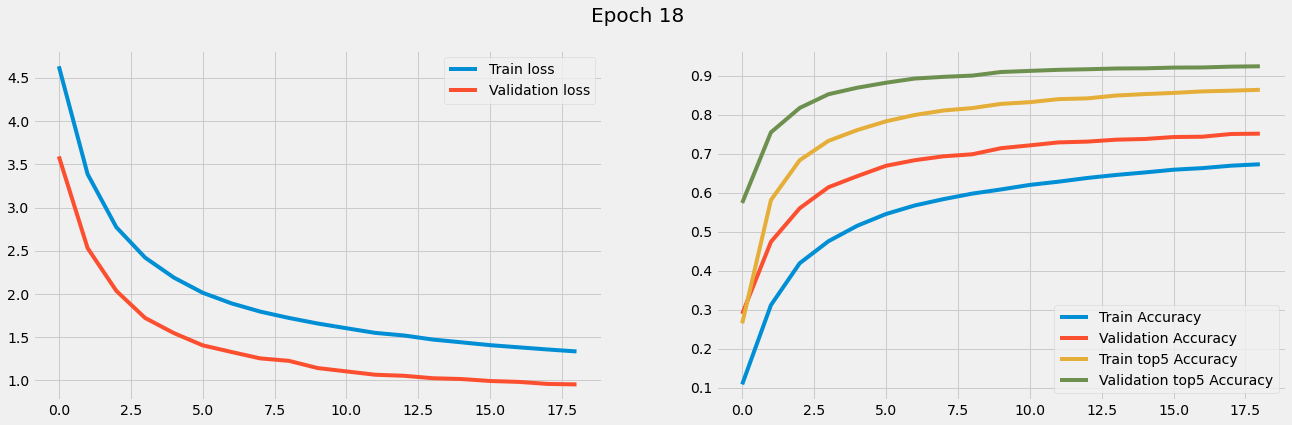

Training:   0%|          | 0/700 [00:00<?, ?it/s]

train exited
8.29 hours


In [14]:
run_experiment(model, optimizer)

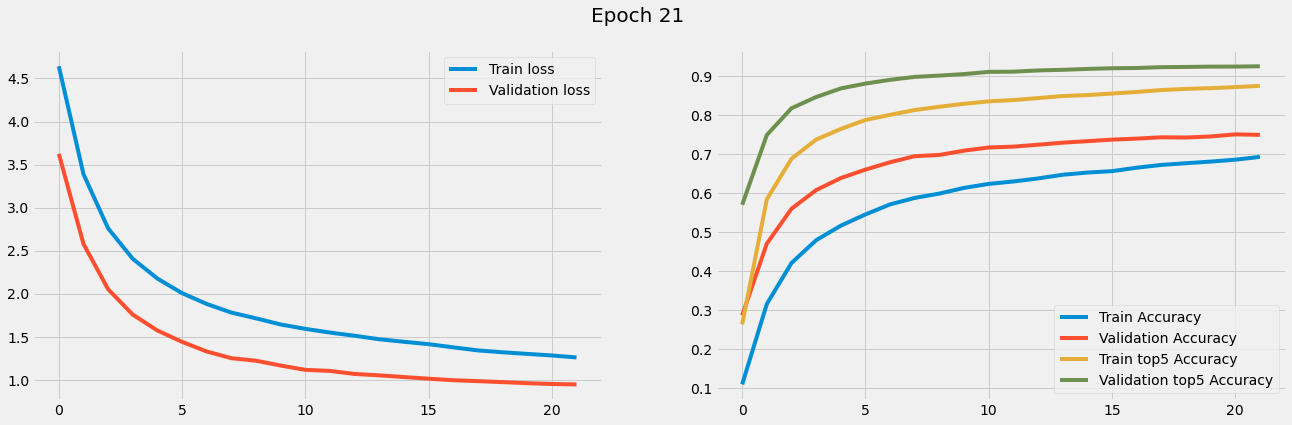

Training:   0%|          | 0/700 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 400.00 MiB (GPU 0; 12.00 GiB total capacity; 9.14 GiB already allocated; 0 bytes free; 11.05 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [18]:
# with tg bot and determenistic

run_experiment(model, optimizer)

In [19]:
torch.save(model.state_dict(), 'ADASGDHEss_epoch22.pth')

In [15]:
model.load_state_dict(torch.load('ADASGDHEss_epoch22.pth'))

<All keys matched successfully>

In [16]:
run_experiment(model, optimizer)

loading dataset:   0%|          | 0/70000 [00:00<?, ?it/s]

loading dataset:   0%|          | 0/30000 [00:00<?, ?it/s]

Training:   0%|          | 0/700 [00:00<?, ?it/s]

C:\Users\rus75\anaconda3\lib\site-packages\torch\autograd\__init__.py:197: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\autograd\engine.cpp:1064.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


UnboundLocalError: local variable 'v_loss' referenced before assignment

In [13]:
# stanford

data_dir = 'D:/StanfordTinyImageNet/tiny-imagenet-200/'

train_transforms = tr.Compose([tr.Lambda(lambda x: x.convert("RGB")),
    tr.Resize((128, 128)),
            tr.RandomHorizontalFlip(),
            tr.RandomResizedCrop(128),
#             tr.ConvertImageDtype(torch.float32),
            tr.ToTensor(),
            tr.Normalize(
                mean=[0.4802,0.4481,0.3975],
                std=[0.2302,0.2265,0.2262])])

val_transforms = tr.Compose([tr.Lambda(lambda x: x.convert("RGB")),
    tr.Resize((128, 128)),
                     # tr.CenterCrop(256),
#                         tr.ConvertImageDtype(torch.float32),
                        tr.ToTensor(),
                        tr.Normalize(
                            mean=[0.4802,0.4481,0.3975],
                            std=[0.2302,0.2265,0.2262]
                        )
                    ])


In [14]:
import os
import glob
from torch.utils.data import Dataset
from PIL import Image

EXTENSION = 'JPEG'
NUM_IMAGES_PER_CLASS = 500
CLASS_LIST_FILE = 'wnids.txt'
VAL_ANNOTATION_FILE = 'val_annotations.txt'

class TinyImageNet(Dataset):

    def __init__(self, root, split='train', transform=None, target_transform=None, in_memory=True):
        self.root = os.path.expanduser(root)
        self.split = split
        self.transform = transform
        self.target_transform = target_transform
        self.in_memory = in_memory
        self.split_dir = os.path.join(root, self.split)
        self.image_paths = sorted(glob.iglob(os.path.join(self.split_dir, '**', '*.%s' % EXTENSION), recursive=True))
        self.labels = {}  # fname - label number mapping
        self.images = []  # used for in-memory processing

        # build class label - number mapping
        with open(os.path.join(self.root, CLASS_LIST_FILE), 'r') as fp:
            self.label_texts = sorted([text.strip() for text in fp.readlines()])
        self.label_text_to_number = {text: i for i, text in enumerate(self.label_texts)}

        if self.split == 'train':
            for label_text, i in self.label_text_to_number.items():
                for cnt in range(NUM_IMAGES_PER_CLASS):
                    self.labels['%s_%d.%s' % (label_text, cnt, EXTENSION)] = i
        elif self.split == 'val':
            with open(os.path.join(self.split_dir, VAL_ANNOTATION_FILE), 'r') as fp:
                for line in fp.readlines():
                    terms = line.split('\t')
                    file_name, label_text = terms[0], terms[1]
                    self.labels[file_name] = self.label_text_to_number[label_text]

        # read all images into torch tensor in memory to minimize disk IO overhead
        if self.in_memory:
            self.images = [self.read_image(path) for path in tqdm(self.image_paths)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        file_path = self.image_paths[index]

        if self.in_memory:
            img = self.images[index]
        else:
            img = self.read_image(file_path)

        if self.split == 'test':
            return img
        else:
            # file_name = file_path.split('/')[-1]
            return img, self.labels[os.path.basename(file_path)]

    def __repr__(self):
        fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
        fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
        tmp = self.split
        fmt_str += '    Split: {}\n'.format(tmp)
        fmt_str += '    Root Location: {}\n'.format(self.root)
        tmp = '    Transforms (if any): '
        fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        tmp = '    Target Transforms (if any): '
        fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        return fmt_str

    def read_image(self, path):
        img = Image.open(path).convert('RGB')
        if len(img.getbands()) == 1:
            print(img.size)
            print(img.getbands())
            print(path)
        return self.transform(img) if self.transform else img

In [15]:
def build_dataloaders(train_transforms, val_transforms, batch_size=100):
    train_dataset = TinyImageNet('D:/StanfordTinyImageNet/tiny-imagenet-200/', split='train', transform = train_transforms, in_memory=True)
    val_dataset = TinyImageNet('D:/StanfordTinyImageNet/tiny-imagenet-200/', split='val', transform = val_transforms, in_memory=True)

    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size, shuffle = False)
    return train_dataloader, val_dataloader

In [16]:
def run_experiment(model, optim):
    start = time.time()
    torch.cuda.empty_cache()
    train_dl, val_dl = build_dataloaders(train_transforms, val_transforms, batch_size=100)
#     optim = optimizer(model.parameters(), **config['optimizer']['kwargs'])
    criterion = nn.CrossEntropyLoss()
    epochs = 50
#     if config.get('scheduler', None) is not None:
#         scheduler = [s['class'](optim, verbose=True, **s['kwargs']) for s in config['scheduler']]
#         print(scheduler)
#     else:
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, factor = 0.5, patience = 3)
    
    exp_path = pathlib.Path(f'results/AdaSGDHess_Stanford')
    (exp_path / "checkpoints").mkdir(parents=True, exist_ok=True)
    loss, acc, fig = run_learning(model, train_dl, val_dl, criterion, optim, epochs, exp_path / "checkpoints", scheduler=scheduler)
#     answers = predict(model, test_dl)
#     answers.to_csv(exp_path / 'labels_test.csv', index=False)
#     fig.savefig(exp_path / 'metrics.png')
#     with open(exp_pat/h / 'config', 'wb') as c:
#         pickle.dump(config, c)
#     torch.save(model.state_dict(), exp_path / 'ADASGD.pth')
    print(f'{(time.time() - start)/3600:.2f} hours')


# def aaa():
#     import matplotlib.pyplot as plt
#     a = []
#     for i in range(10):
#         a.append(i)
#         plt.plot(a)

In [17]:
from torchvision.models import resnet18
model = resnet18(pretrained=True)
model.fc = nn.Linear(512, 200)
model = model.to(DEVICE)

In [19]:
optimizer = AdaptiveSGD(model.parameters(), lr = 0.15, momentum=0.9, weight_decay=1e-4)

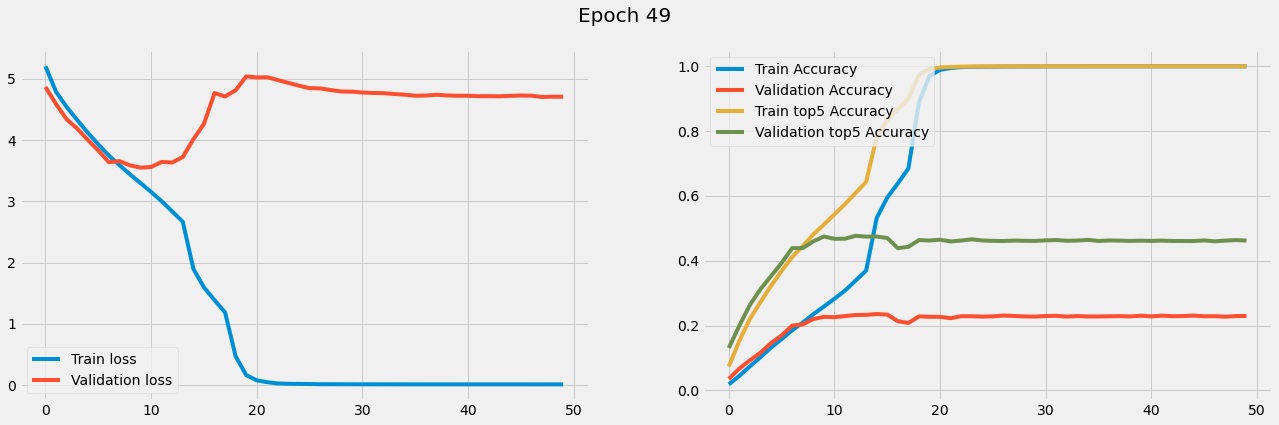

7.07 hours


In [20]:
run_experiment(model, optimizer)

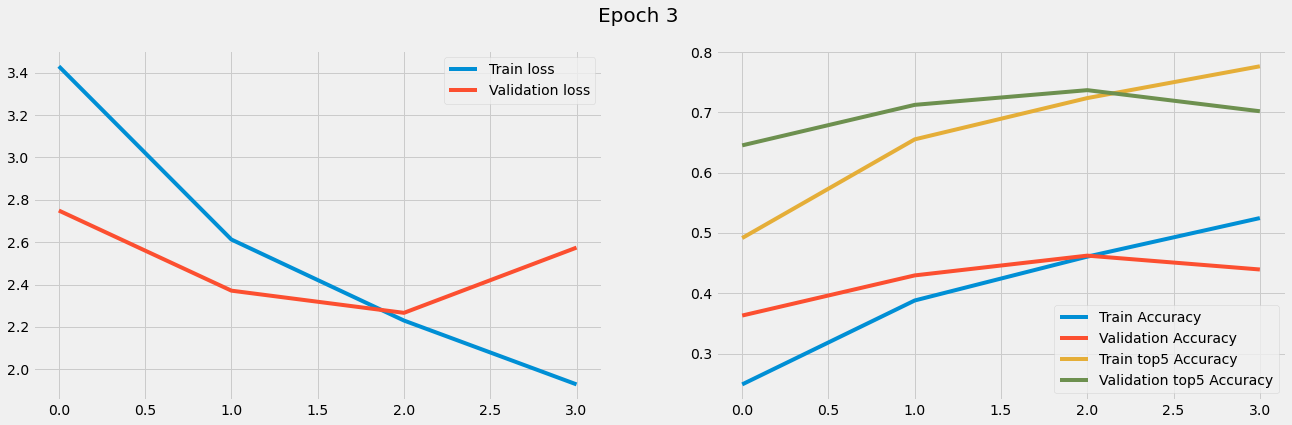

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

train exited
0.82 hours


In [18]:
optimizer = AdaptiveSGD_default(model.parameters(), lr = 0.1*100/256, momentum=0.9, weight_decay=1e-4)
run_experiment(model, optimizer)